# Heart Disease vs. Mental Health Rates

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#file to load
mentalHealth_df = Path("../Resources/500_Cities_Mental_health_.csv")
heartDisease_df = Path("../Resources/states_df.csv")

heartDisease_df = pd.read_csv(heartDisease_df)
mentalHealth_df = pd.read_csv(mentalHealth_df)


# Data Cleaning

In [2]:
# Shows all the unique values under the State Description column
mentalHealth_df['StateDesc'].unique()
# Drop Values in Array that aren't states
mental_states = mentalHealth_df.drop(mentalHealth_df.loc[mentalHealth_df['StateDesc'] == 'District of C', :].index)
mental_states = mental_states.drop(mentalHealth_df.loc[mentalHealth_df['StateDesc'] == 'United States', :].index)

# Mental Health & Heart Disease DataFrames

In [3]:
#Select Index
mental_health = mental_states[["StateDesc", 'CityName', "Data_Value", "PopulationCount","Measure"]] 

#convert data value (%) to real number and add to dataframe
percent = mental_health["Data_Value"]*0.01
poormentalHealth = percent * mental_health['PopulationCount']
poormentalHealth = round(poormentalHealth)
poormentalHealth = poormentalHealth.rename('TotalPoorMentalHealth')
mental_health = pd.concat([mental_health, poormentalHealth], axis=1)
calculation_data = mental_health.groupby(by = "StateDesc").sum()
percentage = calculation_data["TotalPoorMentalHealth"]/calculation_data["PopulationCount"]
percentage_mentalHealth = percentage.rename("CHeartDisease_Percentage")

# Drops all rows that contain null values
mental_healthDf = mental_health.dropna()

mental_healthDf

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalPoorMentalHealth
0,Connecticut,Stamford,10.0,122643,Mental health not good for >=14 days among adu...,12264.0
1,Iowa,Iowa City,13.2,67862,Mental health not good for >=14 days among adu...,8958.0
2,Louisiana,Lake Charles,16.6,71993,Mental health not good for >=14 days among adu...,11951.0
3,Minnesota,Minneapolis,11.4,382578,Mental health not good for >=14 days among adu...,43614.0
4,Minnesota,Rochester,10.1,106769,Mental health not good for >=14 days among adu...,10784.0
...,...,...,...,...,...,...
29001,Wisconsin,Milwaukee,18.4,2829,Mental health not good for >=14 days among adu...,521.0
29002,Wisconsin,Milwaukee,18.3,1451,Mental health not good for >=14 days among adu...,266.0
29003,Wisconsin,Milwaukee,19.7,4185,Mental health not good for >=14 days among adu...,824.0
29004,Wisconsin,Milwaukee,13.4,4913,Mental health not good for >=14 days among adu...,658.0


In [4]:
# Select Index
heart_disease = heartDisease_df[["StateDesc",'CityName', "Data_Value", "PopulationCount","Measure"]]

#convert data value (%) to real number & add to dataframe
Mpercent = heart_disease["Data_Value"]*0.01
CHeartDisease = Mpercent * heart_disease['PopulationCount']
CHeartDisease = round(CHeartDisease)
CHeartDisease = CHeartDisease.rename('TotalHeartDisease')
heart_disease = pd.concat([heart_disease, CHeartDisease], axis=1)
calculation_data = heart_disease.groupby(by = "StateDesc").sum()
percentage = calculation_data["TotalHeartDisease"]/calculation_data["PopulationCount"]
percentage_heartDisease = percentage.rename("CHeartDisease_Percentage")

# Drops all rows that contain null values
heart_diseaseDf = heart_disease.dropna()


heart_diseaseDf

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalHeartDisease
0,California,Hayward,4.8,144186,Coronary heart disease among adults aged >=18 ...,6921.0
1,Alabama,Huntsville,6.7,180105,Coronary heart disease among adults aged >=18 ...,12067.0
2,Arizona,Chandler,3.8,236123,Coronary heart disease among adults aged >=18 ...,8973.0
3,Arizona,Surprise,5.9,117517,Coronary heart disease among adults aged >=18 ...,6934.0
4,California,Bellflower,5.3,76616,Coronary heart disease among adults aged >=18 ...,4061.0
...,...,...,...,...,...,...
28818,Wisconsin,Milwaukee,6.4,3197,Coronary heart disease among adults aged >=18 ...,205.0
28819,Washington,Tacoma,5.9,4855,Coronary heart disease among adults aged >=18 ...,286.0
28820,Wisconsin,Green Bay,5.8,2669,Coronary heart disease among adults aged >=18 ...,155.0
28821,Wisconsin,Milwaukee,6.5,3732,Coronary heart disease among adults aged >=18 ...,243.0


# Heart Disease Summary

In [5]:
# Calculate total number of states
total_states = heart_diseaseDf.StateDesc.nunique()

# Calculate total number of cities
total_cities = heart_diseaseDf.CityName.nunique()

# Calculate the total population
population = heart_diseaseDf.PopulationCount.sum()

# Calculate the average heart disease count
# Convert Heart Disease "Data_Value" from percent 
heart_disease = heart_diseaseDf.TotalHeartDisease.sum()


avgheart_disease = heart_disease.mean()

#Calulate Total heart Disease Count
totalHeart_disease = heart_disease.sum()

# Calculate the percentage of adults 18+ with Heart Disease
percent_heart = totalHeart_disease/population 

In [6]:
heartDisease_summary = pd.DataFrame({"Total States" : [total_states], 'Total Cities' : [total_cities], 
                        "Total Population" : [population], "Average Heart Disease Count" : [avgheart_disease], 
                        "Total Heart Disease Count" : [totalHeart_disease], "% Adults with Heart Disease": [percent_heart]})
#formatting
heartDisease_summary["% Adults with Heart Disease"] = heartDisease_summary["% Adults with Heart Disease"].map("{:.2%}".format)

heartDisease_summary            

,Total States,Total Cities,Total Population,Average Heart Disease Count,Total Heart Disease Count,% Adults with Heart Disease
0,50,473,307245461,16936661.0,16936661.0,5.51%


# Mental Health Summary

In [7]:
# Calculate total number of states
Mtotal_states = mental_healthDf.StateDesc.nunique()

# Calculate total number of cities
Mtotal_cities = mental_healthDf.CityName.nunique()

# Calculate the total population
Mpopulation = mental_healthDf.PopulationCount.sum()

# Calculate average Mental Health not good for >=14 days
# Convert Heart Disease "Data_Value" from percent 
mental_health = mental_healthDf.TotalPoorMentalHealth.sum()

avgmental_health = mental_health.mean()

#Calulate Total heart Disease Count
totalMental_health = mental_health.sum()

# Calculate the percentage of adults 18+ with not good mental health >=14 days
percent_mental = totalMental_health/Mpopulation

In [8]:
mentalHealth_summary = pd.DataFrame({"Total States" : [Mtotal_states], 'Total Cities' : [Mtotal_cities], 
                        "Total Population" : [Mpopulation], "Average Poor Mental Health Count" : [avgmental_health], 
                        "Total Adults with Poor Mental Health" : [totalMental_health], "% Adults with Poor Mental Health": [percent_mental]})
#formatting
mentalHealth_summary["% Adults with Poor Mental Health"] = mentalHealth_summary["% Adults with Poor Mental Health"].map("{:.2%}".format)

mentalHealth_summary    

,Total States,Total Cities,Total Population,Average Poor Mental Health Count,Total Adults with Poor Mental Health,% Adults with Poor Mental Health
0,50,473,307245461,41925464.0,41925464.0,13.65%


# State Summary

In [9]:
# Using the aggregation method, produce summary statistics for heart disease per state
heart_diseaseDf.groupby(['StateDesc'])['TotalHeartDisease'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
StateDesc,,,,,
Alabama,550.764706,187.0,4.445130e+06,2108.347688,111.585593
Alaska,682.473684,209.0,6.064367e+06,2462.593516,326.178479
Arizona,589.057617,187.5,1.568922e+07,3960.962489,123.780078
Arkansas,702.757812,269.0,3.091031e+06,1758.132782,155.398452
California,587.199599,195.0,1.803519e+07,4246.785958,57.362817
Colorado,474.066011,159.0,4.209964e+06,2051.819716,76.895195
Connecticut,617.105932,211.0,2.453216e+06,1566.274406,101.955780
Delaware,522.500000,190.5,1.400135e+06,1183.273062,232.058940
Florida,755.596620,263.0,8.720996e+06,2953.133329,80.048646


In [10]:
# Using the aggregation method, produce summary statistics for poor mental health per state
mental_healthDf.groupby(['StateDesc'])['TotalPoorMentalHealth'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
StateDesc,,,,,
Alabama,1284.689076,435.0,2.350458e+07,4848.152427,256.591436
Alaska,1743.982456,608.0,3.584164e+07,5986.788793,792.969547
Arizona,1536.178711,516.0,1.052384e+08,10258.577742,320.580554
Arkansas,1727.445312,623.5,1.706826e+07,4131.375550,365.165458
California,1540.532385,520.0,1.193095e+08,10922.888750,147.539263
Colorado,1284.134831,436.5,3.011938e+07,5488.112289,205.675704
Connecticut,1509.584746,540.0,1.419726e+07,3767.924895,245.271019
Delaware,1386.769231,504.5,9.683446e+06,3111.823611,610.278820
Florida,1635.621602,553.0,4.275517e+07,6538.743734,177.241434


# Mental Health by City

In [11]:
# 10 Best Mental Health Cities
high_mental = mental_healthDf.sort_values('Data_Value')
high_mental.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalPoorMentalHealth
6911,California,Santa Barbara,4.2,333,Mental health not good for >=14 days among adu...,14.0
1568,California,Carlsbad,4.2,1006,Mental health not good for >=14 days among adu...,42.0
5032,California,Oceanside,5.2,80,Mental health not good for >=14 days among adu...,4.0
1884,California,Fremont,5.8,4029,Mental health not good for >=14 days among adu...,234.0
25054,Texas,Dallas,5.8,467,Mental health not good for >=14 days among adu...,27.0
23902,Tennessee,Memphis,5.9,126,Mental health not good for >=14 days among adu...,7.0
12020,Illinois,Schaumburg,5.9,1010,Mental health not good for >=14 days among adu...,60.0
26819,Texas,San Antonio,5.9,855,Mental health not good for >=14 days among adu...,50.0
10161,Hawaii,Honolulu,5.9,913,Mental health not good for >=14 days among adu...,54.0
26461,Texas,Lewisville,6.0,96,Mental health not good for >=14 days among adu...,6.0


In [12]:
# 10 Lowest Heart Disease Cities
lowest_heartDisease = heart_diseaseDf.sort_values('Data_Value')
lowest_heartDisease.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalHeartDisease
10677,Illinois,Aurora,0.3,51,Coronary heart disease among adults aged >=18 ...,0.0
1341,California,Berkeley,0.4,1215,Coronary heart disease among adults aged >=18 ...,5.0
17249,New York,Albany,0.4,5203,Coronary heart disease among adults aged >=18 ...,21.0
4921,California,Pomona,0.4,536,Coronary heart disease among adults aged >=18 ...,2.0
24364,Texas,Corpus Christi,0.5,1267,Coronary heart disease among adults aged >=18 ...,6.0
2481,California,Long Beach,0.5,1863,Coronary heart disease among adults aged >=18 ...,9.0
3608,California,Los Angeles,0.5,9344,Coronary heart disease among adults aged >=18 ...,47.0
5861,California,San Diego,0.5,3435,Coronary heart disease among adults aged >=18 ...,17.0
10216,Hawaii,Honolulu,0.5,341,Coronary heart disease among adults aged >=18 ...,2.0
19500,New York,Rochester,0.6,2320,Coronary heart disease among adults aged >=18 ...,14.0


In [13]:
# 10 Worst Mental Health`Cities
poor_mental = mental_healthDf.sort_values('Data_Value', ascending=False)
poor_mental.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalPoorMentalHealth
20717,Ohio,Cleveland,32.6,2212,Mental health not good for >=14 days among adu...,721.0
13534,Louisiana,New Orleans,32.3,1238,Mental health not good for >=14 days among adu...,400.0
23427,South Carolin,Rock Hill,30.0,1762,Mental health not good for >=14 days among adu...,529.0
15082,Michigan,Flint,30.0,2152,Mental health not good for >=14 days among adu...,646.0
20677,Ohio,Cincinnati,29.9,1916,Mental health not good for >=14 days among adu...,573.0
20929,Ohio,Cleveland,29.8,1927,Mental health not good for >=14 days among adu...,574.0
9655,Florida,Tampa,29.5,5160,Mental health not good for >=14 days among adu...,1522.0
20817,Ohio,Cleveland,29.4,1884,Mental health not good for >=14 days among adu...,554.0
12675,Indiana,Muncie,29.0,6863,Mental health not good for >=14 days among adu...,1990.0
23901,Tennessee,Nashville,28.8,3127,Mental health not good for >=14 days among adu...,901.0


In [14]:
# 10 Highest Heart Disease Cities
bottom_heartDisease = heart_diseaseDf.sort_values('Data_Value', ascending=False)
bottom_heartDisease.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure,TotalHeartDisease
19254,New York,New York,35.8,512,Coronary heart disease among adults aged >=18 ...,183.0
19056,New York,New York,23.2,1246,Coronary heart disease among adults aged >=18 ...,289.0
21491,Ohio,Dayton,21.3,549,Coronary heart disease among adults aged >=18 ...,117.0
9587,Florida,Tampa,20.9,140,Coronary heart disease among adults aged >=18 ...,29.0
9116,Florida,Pembroke Pines,20.3,7569,Coronary heart disease among adults aged >=18 ...,1537.0
20681,Ohio,Cleveland,20.2,956,Coronary heart disease among adults aged >=18 ...,193.0
27564,Washington,Yakima,19.7,227,Coronary heart disease among adults aged >=18 ...,45.0
24088,Texas,Dallas,19.6,467,Coronary heart disease among adults aged >=18 ...,92.0
19051,New York,New York,19.2,72,Coronary heart disease among adults aged >=18 ...,14.0
8540,Florida,Boynton Beach,19.1,240,Coronary heart disease among adults aged >=18 ...,46.0


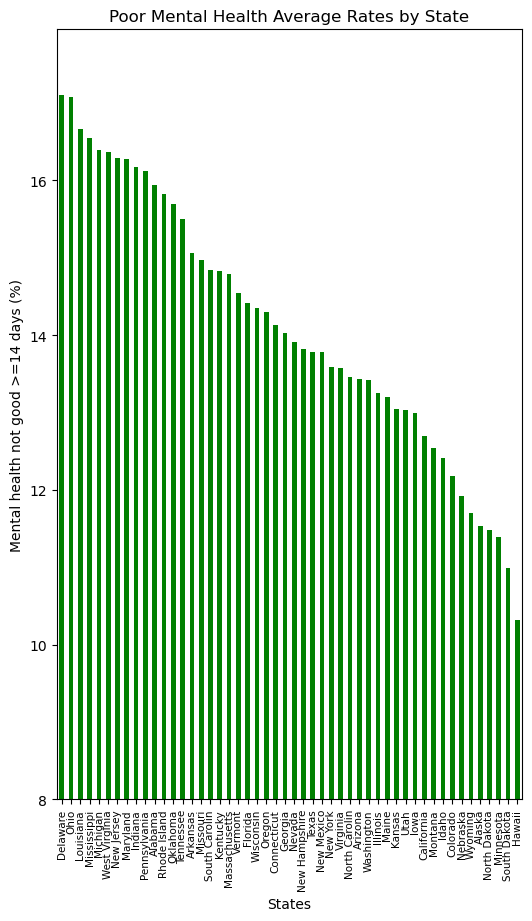

In [15]:
# Group State & Mental Health Data
mentalhealth_bar = mental_healthDf.groupby(['StateDesc'])['Data_Value'].mean()

plt.figure(figsize=(6, 10))
# plot the group in decsending order 
mentalhealth_bar.sort_values(ascending=False).plot.bar(color='g')


# Label x,y axis
plt.xlabel('States')
plt.ylabel('Mental health not good >=14 days (%)')
plt.title('Poor Mental Health Average Rates by State')

#resize/rescale
plt.xticks(fontsize=7.5)
plt.ylim(8)

plt.show()

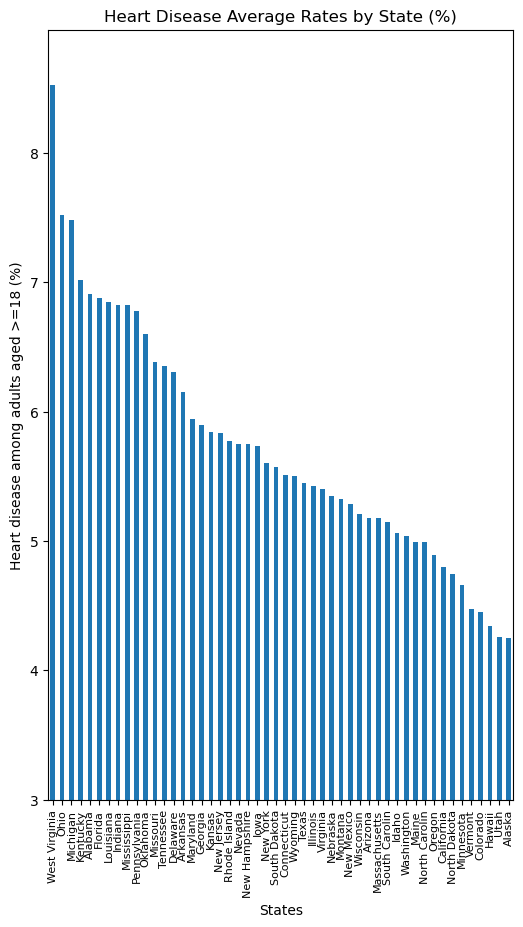

In [24]:
# Group State & Mental Health Data
heartdisease_bar = heart_diseaseDf.groupby(['StateDesc'])['Data_Value'].mean()

plt.figure(figsize=(6, 10))
# plot the group in decsending order 
heartdisease_bar.sort_values(ascending=False).plot.bar()

# Label x,y axis & title
plt.xlabel('States')
plt.ylabel('Heart disease among adults aged >=18 (%)')
plt.title('Heart Disease Average Rates by State (%)')

#resize/rescale
plt.ylim(3)
plt.xticks(fontsize=8)

plt.show()

<Figure size 600x1000 with 0 Axes>

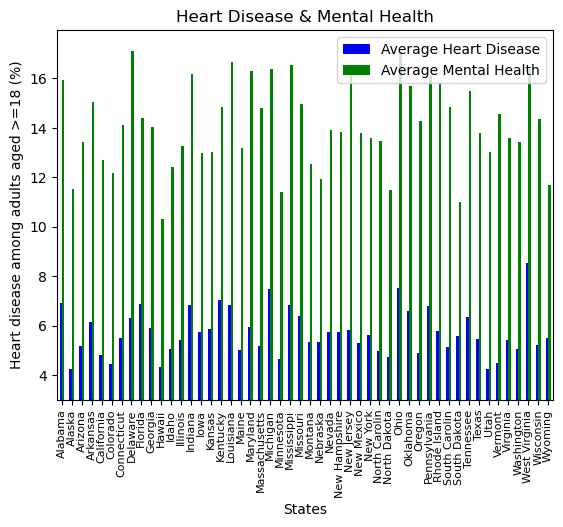

In [20]:
plt.figure(figsize=(6, 10))
mylabels=['Average Heart Disease', 'Average Mental Health']
# plot the group in decsending order 
pd.concat([heartdisease_bar, mentalhealth_bar], axis=1).plot.bar(color=('b','g'))



# Label x,y axis, legend & title
plt.xlabel('States')
plt.ylabel('Heart disease among adults aged >=18 (%)')
plt.title('Heart Disease & Mental Health')
plt.legend(labels=mylabels)

#resize/rescale
plt.xticks(fontsize=8)
plt.ylim(3)

plt.show()

The correlation coefficient between Heart Disease & Mental Health is 0.75
The correlation between Heart Disease & Mental Health is Strong


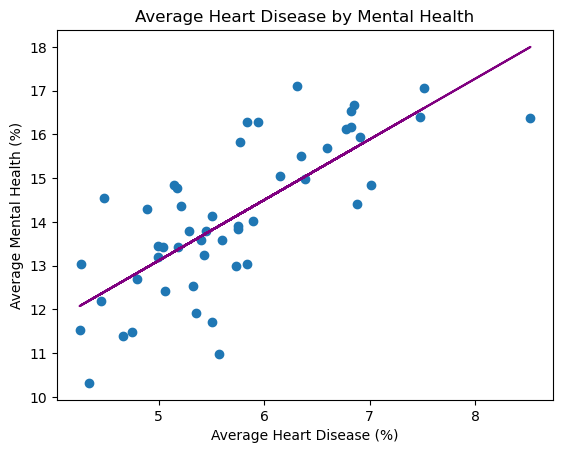

In [18]:
# scatter plot of heart disease vs mental health
plt.scatter(heartdisease_bar, mentalhealth_bar)
# find p values
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(heartdisease_bar, mentalhealth_bar)
p_fit = p_slope*heartdisease_bar+p_int

#plot slope line & label x,y and title
plt.plot(heartdisease_bar, p_fit, color = "purple")
plt.xlabel('Average Heart Disease (%)')
plt.ylabel('Average Mental Health (%)')
plt.title("Average Heart Disease by Mental Health")

#print analysis
print(f'The correlation coefficient between Heart Disease & Mental Health is {round(p_r,2)}')
print(f'The correlation between Heart Disease & Mental Health is Strong')

plt.show()